## Transfer Learning
---

In [1]:
!nvidia-smi

Fri Apr  7 12:31:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install roboflow ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.7/510.7 KB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 20.9 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow

from ultralytics import YOLO

import cv2
from google.colab.patches import cv2_imshow

### Data Ingestion
---

In [4]:
rf = Roboflow(api_key="81Nh7rQ9iwUmDMGYGKnV")
project = rf.workspace("jack-chan-edpdi").project("supermarketscanner")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.68, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to SupermarketScanner-5 in yolov8:: 100%|██████████| 2108/2108 [00:00<00:00, 2598.34it/s]


### YOLO v8 Model Setup
---

In [5]:
model = YOLO("yolov8n-seg.pt")

100%|██████████| 6.73M/6.73M [00:02<00:00, 2.85MB/s]


### Model Training
---

In [6]:
model.train(
    data="/content/SupermarketScanner-5/data.yaml",
    epochs=64,
    name="smkt_scanner"
)

Ultralytics YOLOv8.0.68 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/SupermarketScanner-5/data.yaml, epochs=64, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=smkt_scanner, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

### Model Evaluation
---

In [11]:
def show_image(pth):
    img = cv2.imread(pth)
    cv2_imshow(img)
    
    return None

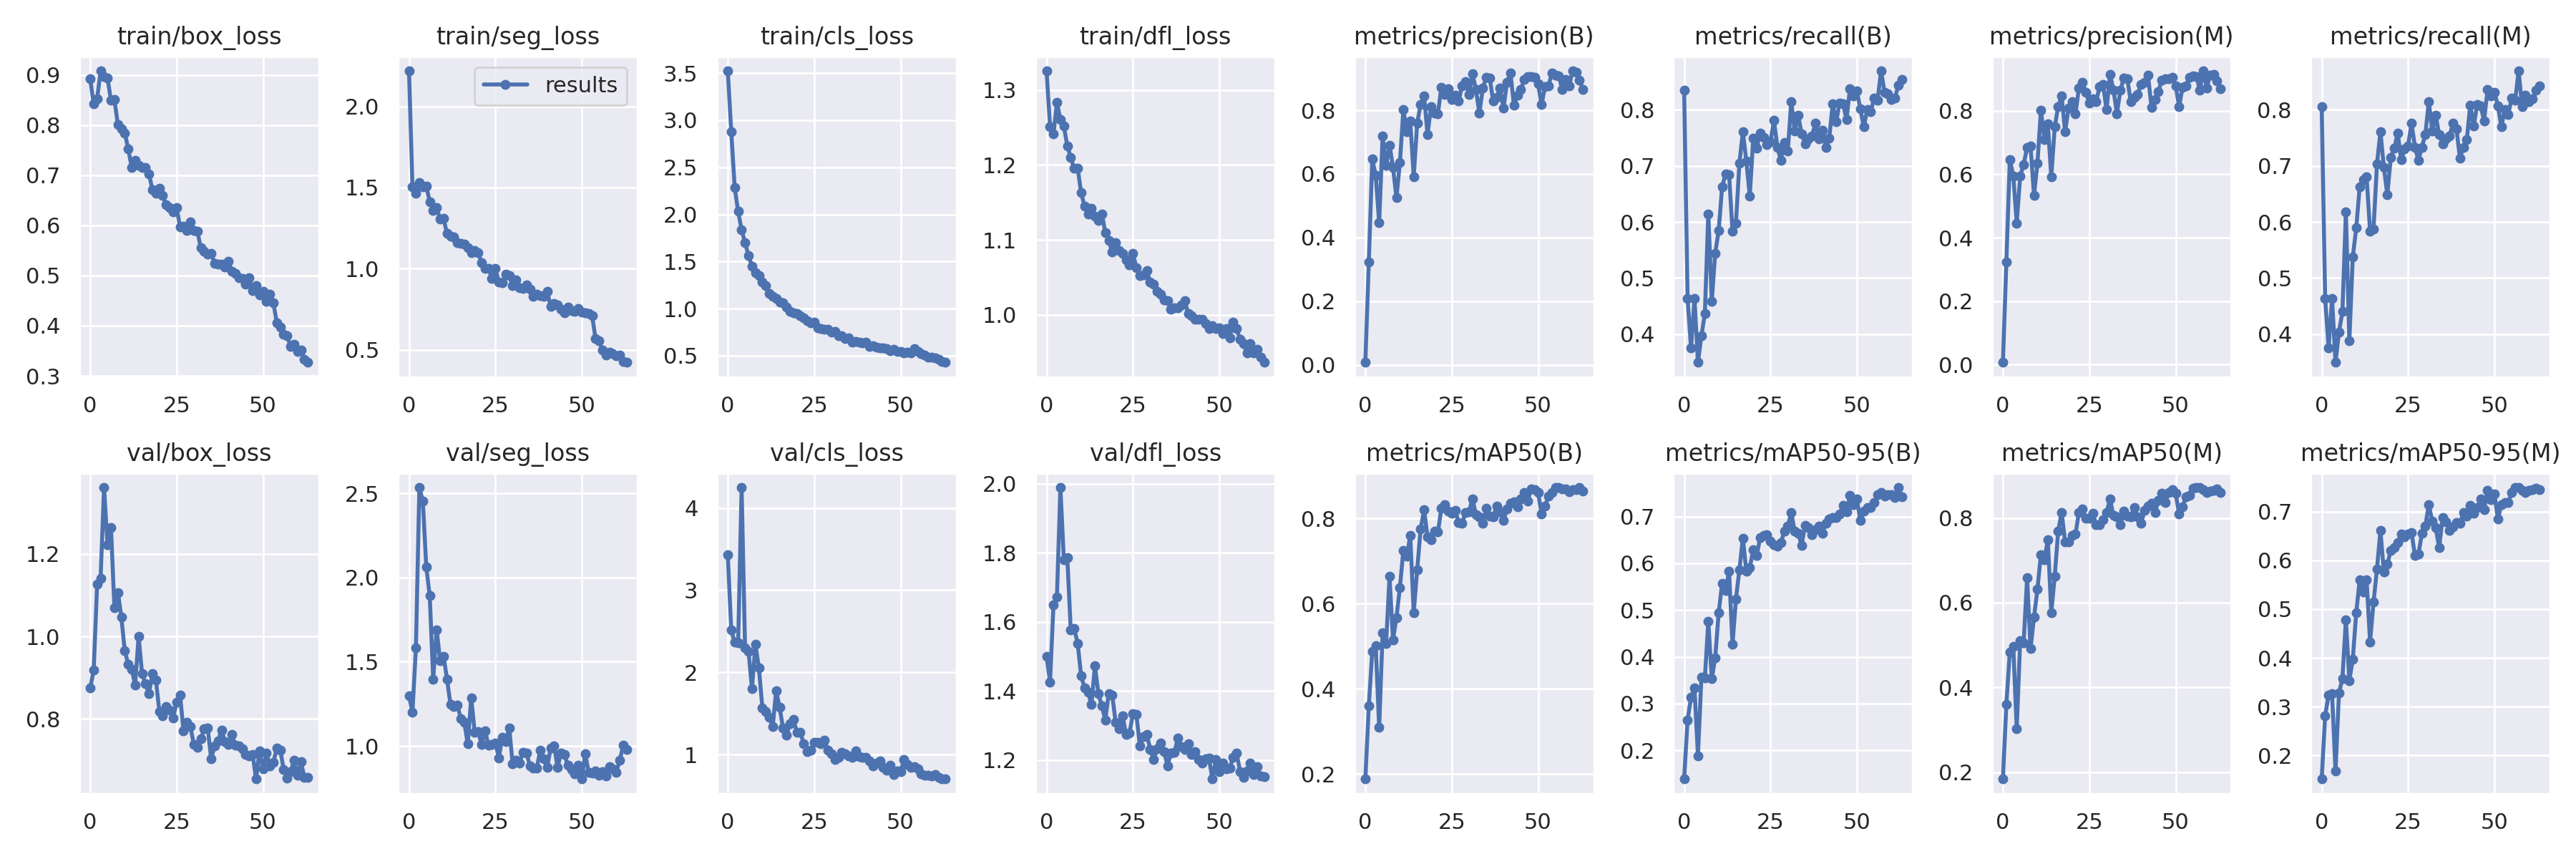

In [12]:
show_image("/content/runs/segment/smkt_scanner/results.png")

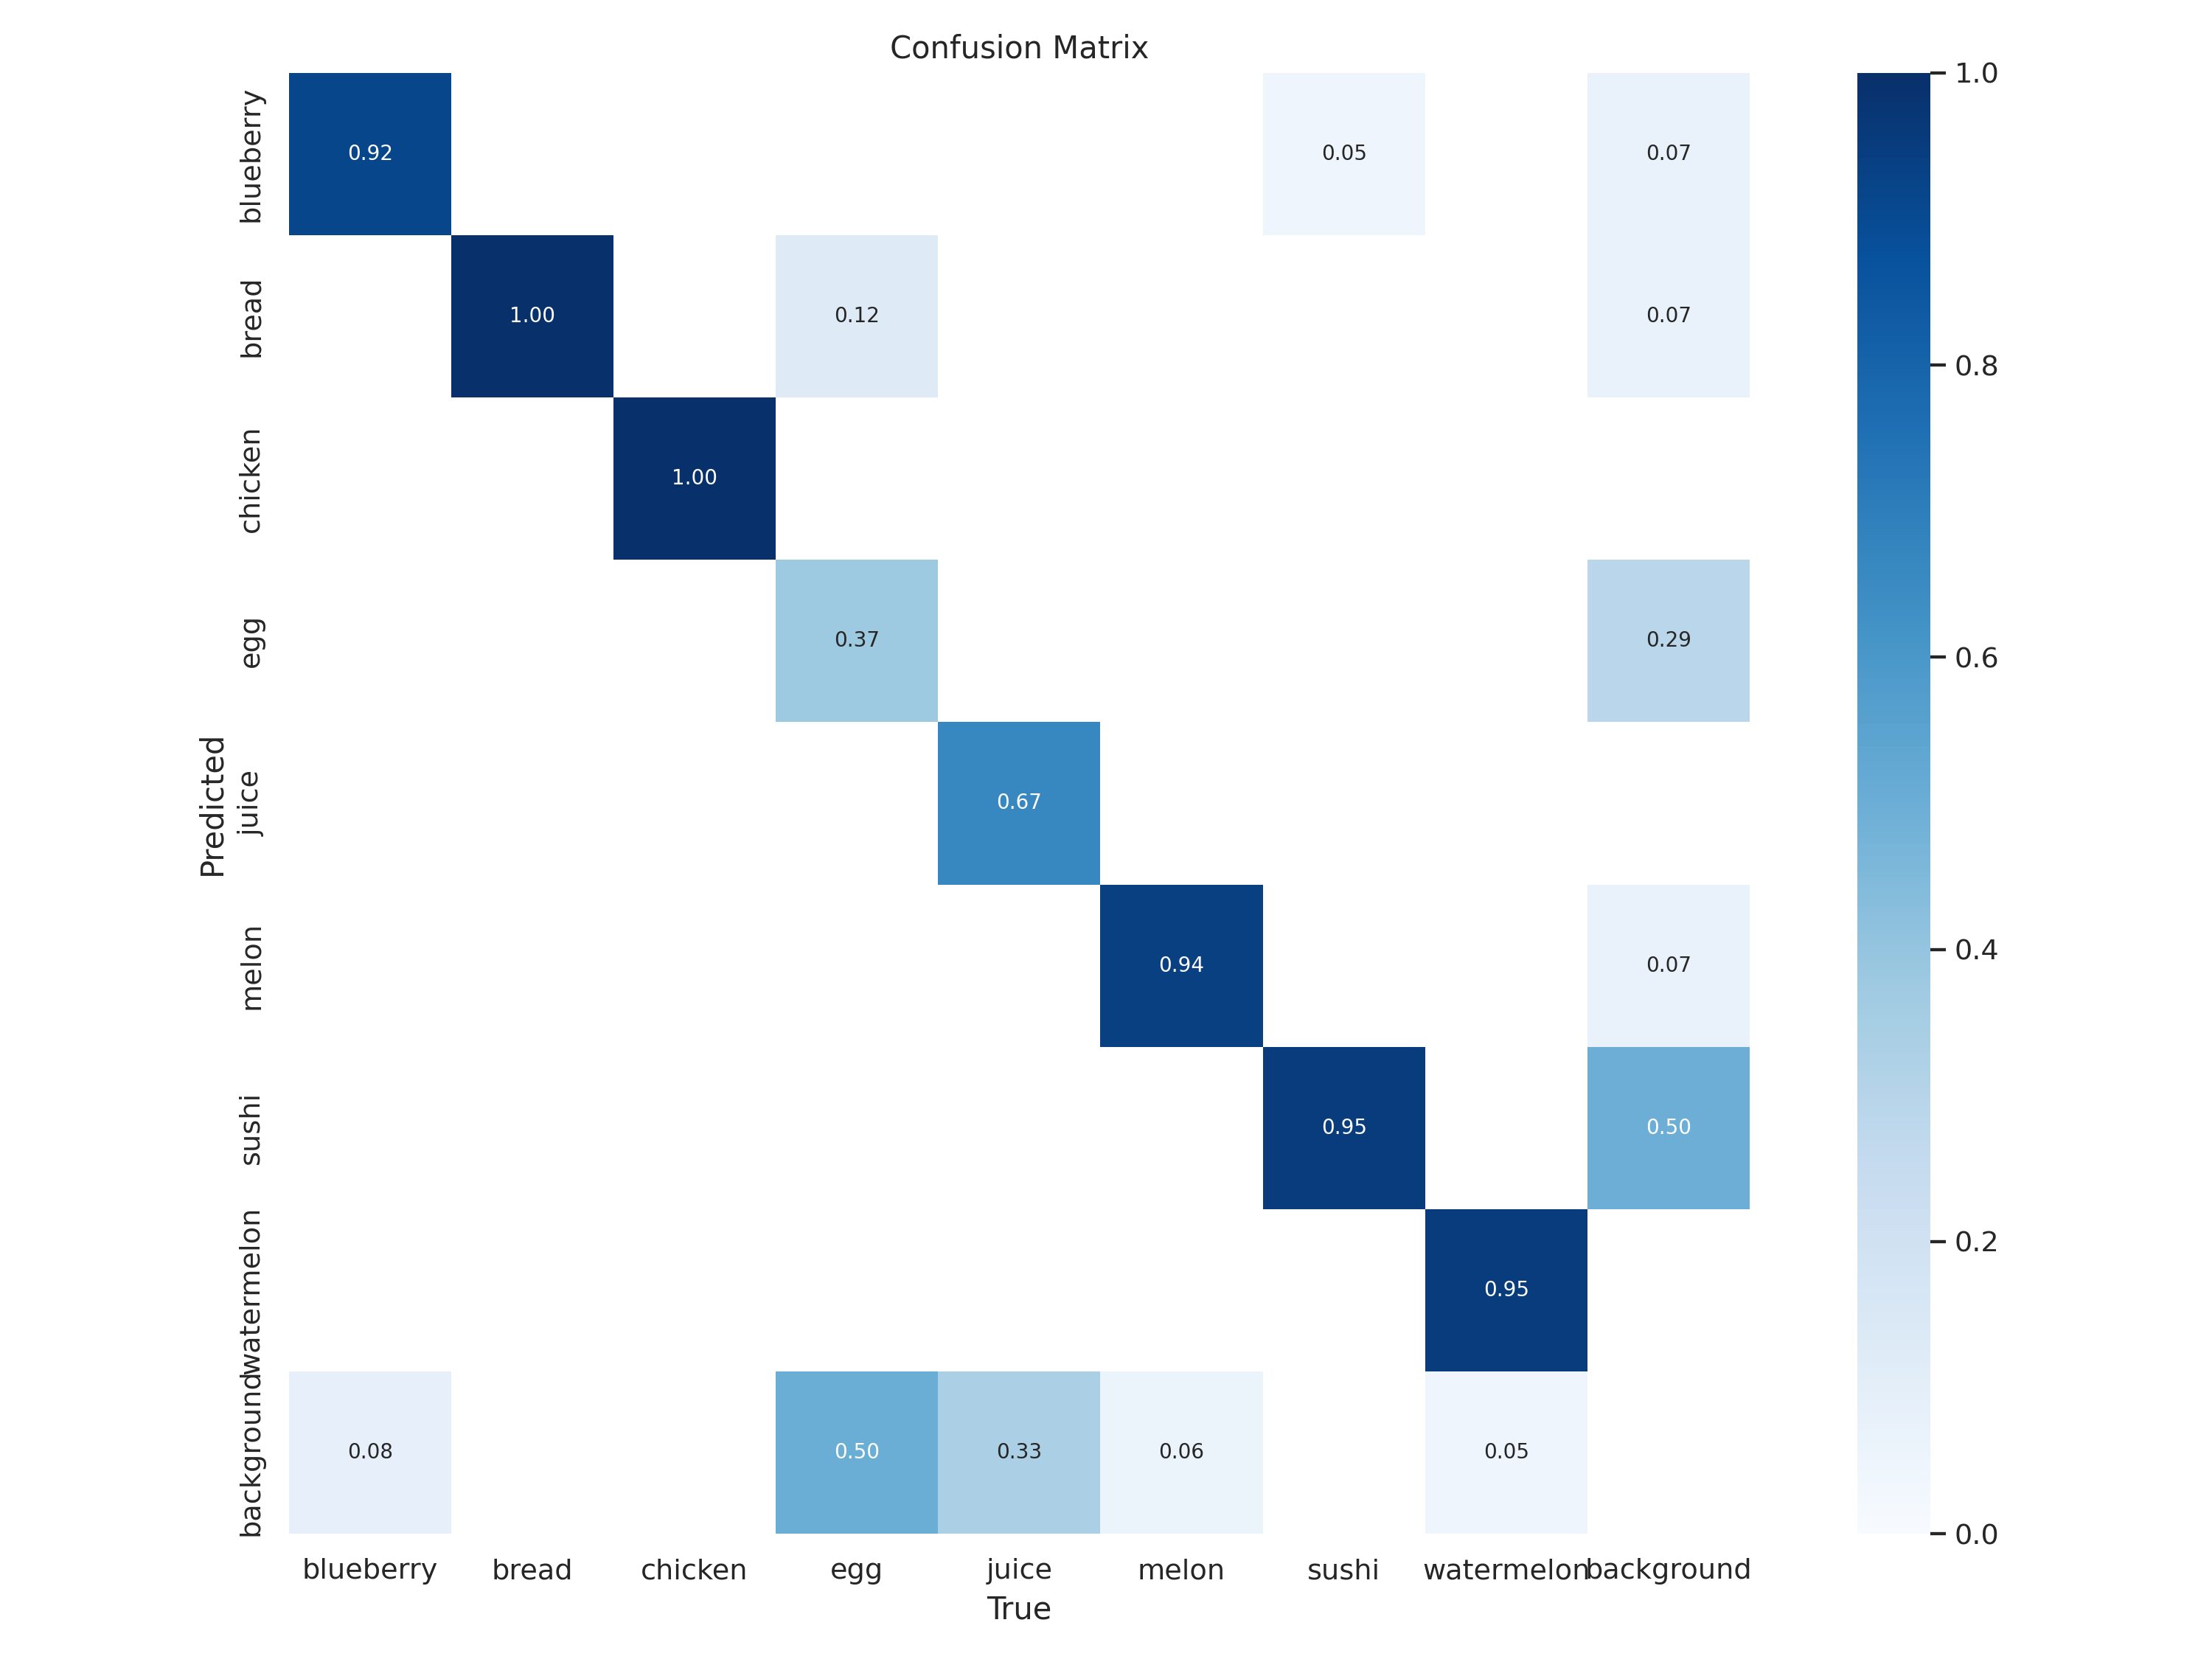

In [13]:
show_image("/content/runs/segment/smkt_scanner/confusion_matrix.png")

In [14]:
model = YOLO("/content/runs/segment/smkt_scanner/weights/best.pt")

model.val(split="test")

Ultralytics YOLOv8.0.68 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259624 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/SupermarketScanner-5/test/labels... 48 images, 0 backgrounds, 8 corrupt: 100%|██████████| 48/48 [00:00<00:00, 732.16it/s]
val: New cache created: /content/SupermarketScanner-5/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                   all         48         92      0.937      0.951      0.934      0.766      0.914      0.926       0.91      0.762
             blueberry         48          7      0.852          1      0.943      0.674      0.851          1      0.943      0.612
                 bread         48          8      0.975          1      0.995      0.854      0.975          1      0.995      0.898
               chicken         4

ultralytics.yolo.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f47c89c6dc0>
fitness: 1.5592804954115713
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'metrics/precision(M)', 'metrics/recall(M)', 'metrics/mAP50(M)', 'metrics/mAP50-95(M)']
maps: array([     1.2864,      1.7517,      1.8678,      1.5684,      1.3167,      1.2546,       1.404,      1.7718])
names: {0: 'blueberry', 1: 'bread', 2: 'chicken', 3: 'egg', 4: 'juice', 5: 'melon', 6: 'sushi', 7: 'watermelon'}
plot: True
results_dict: {'metrics/precision(B)': 0.9367828690489378, 'metrics/recall(B)': 0.9510498179327, 'metrics/mAP50(B)': 0.9336514347030334, 'metrics/mAP50-95(B)': 0.7655390448880705, 'metrics/precision(M)': 0.9136534341426259, 'metrics/recall(M)': 0.9263079213914904, 'metrics/mAP50(M)': 0

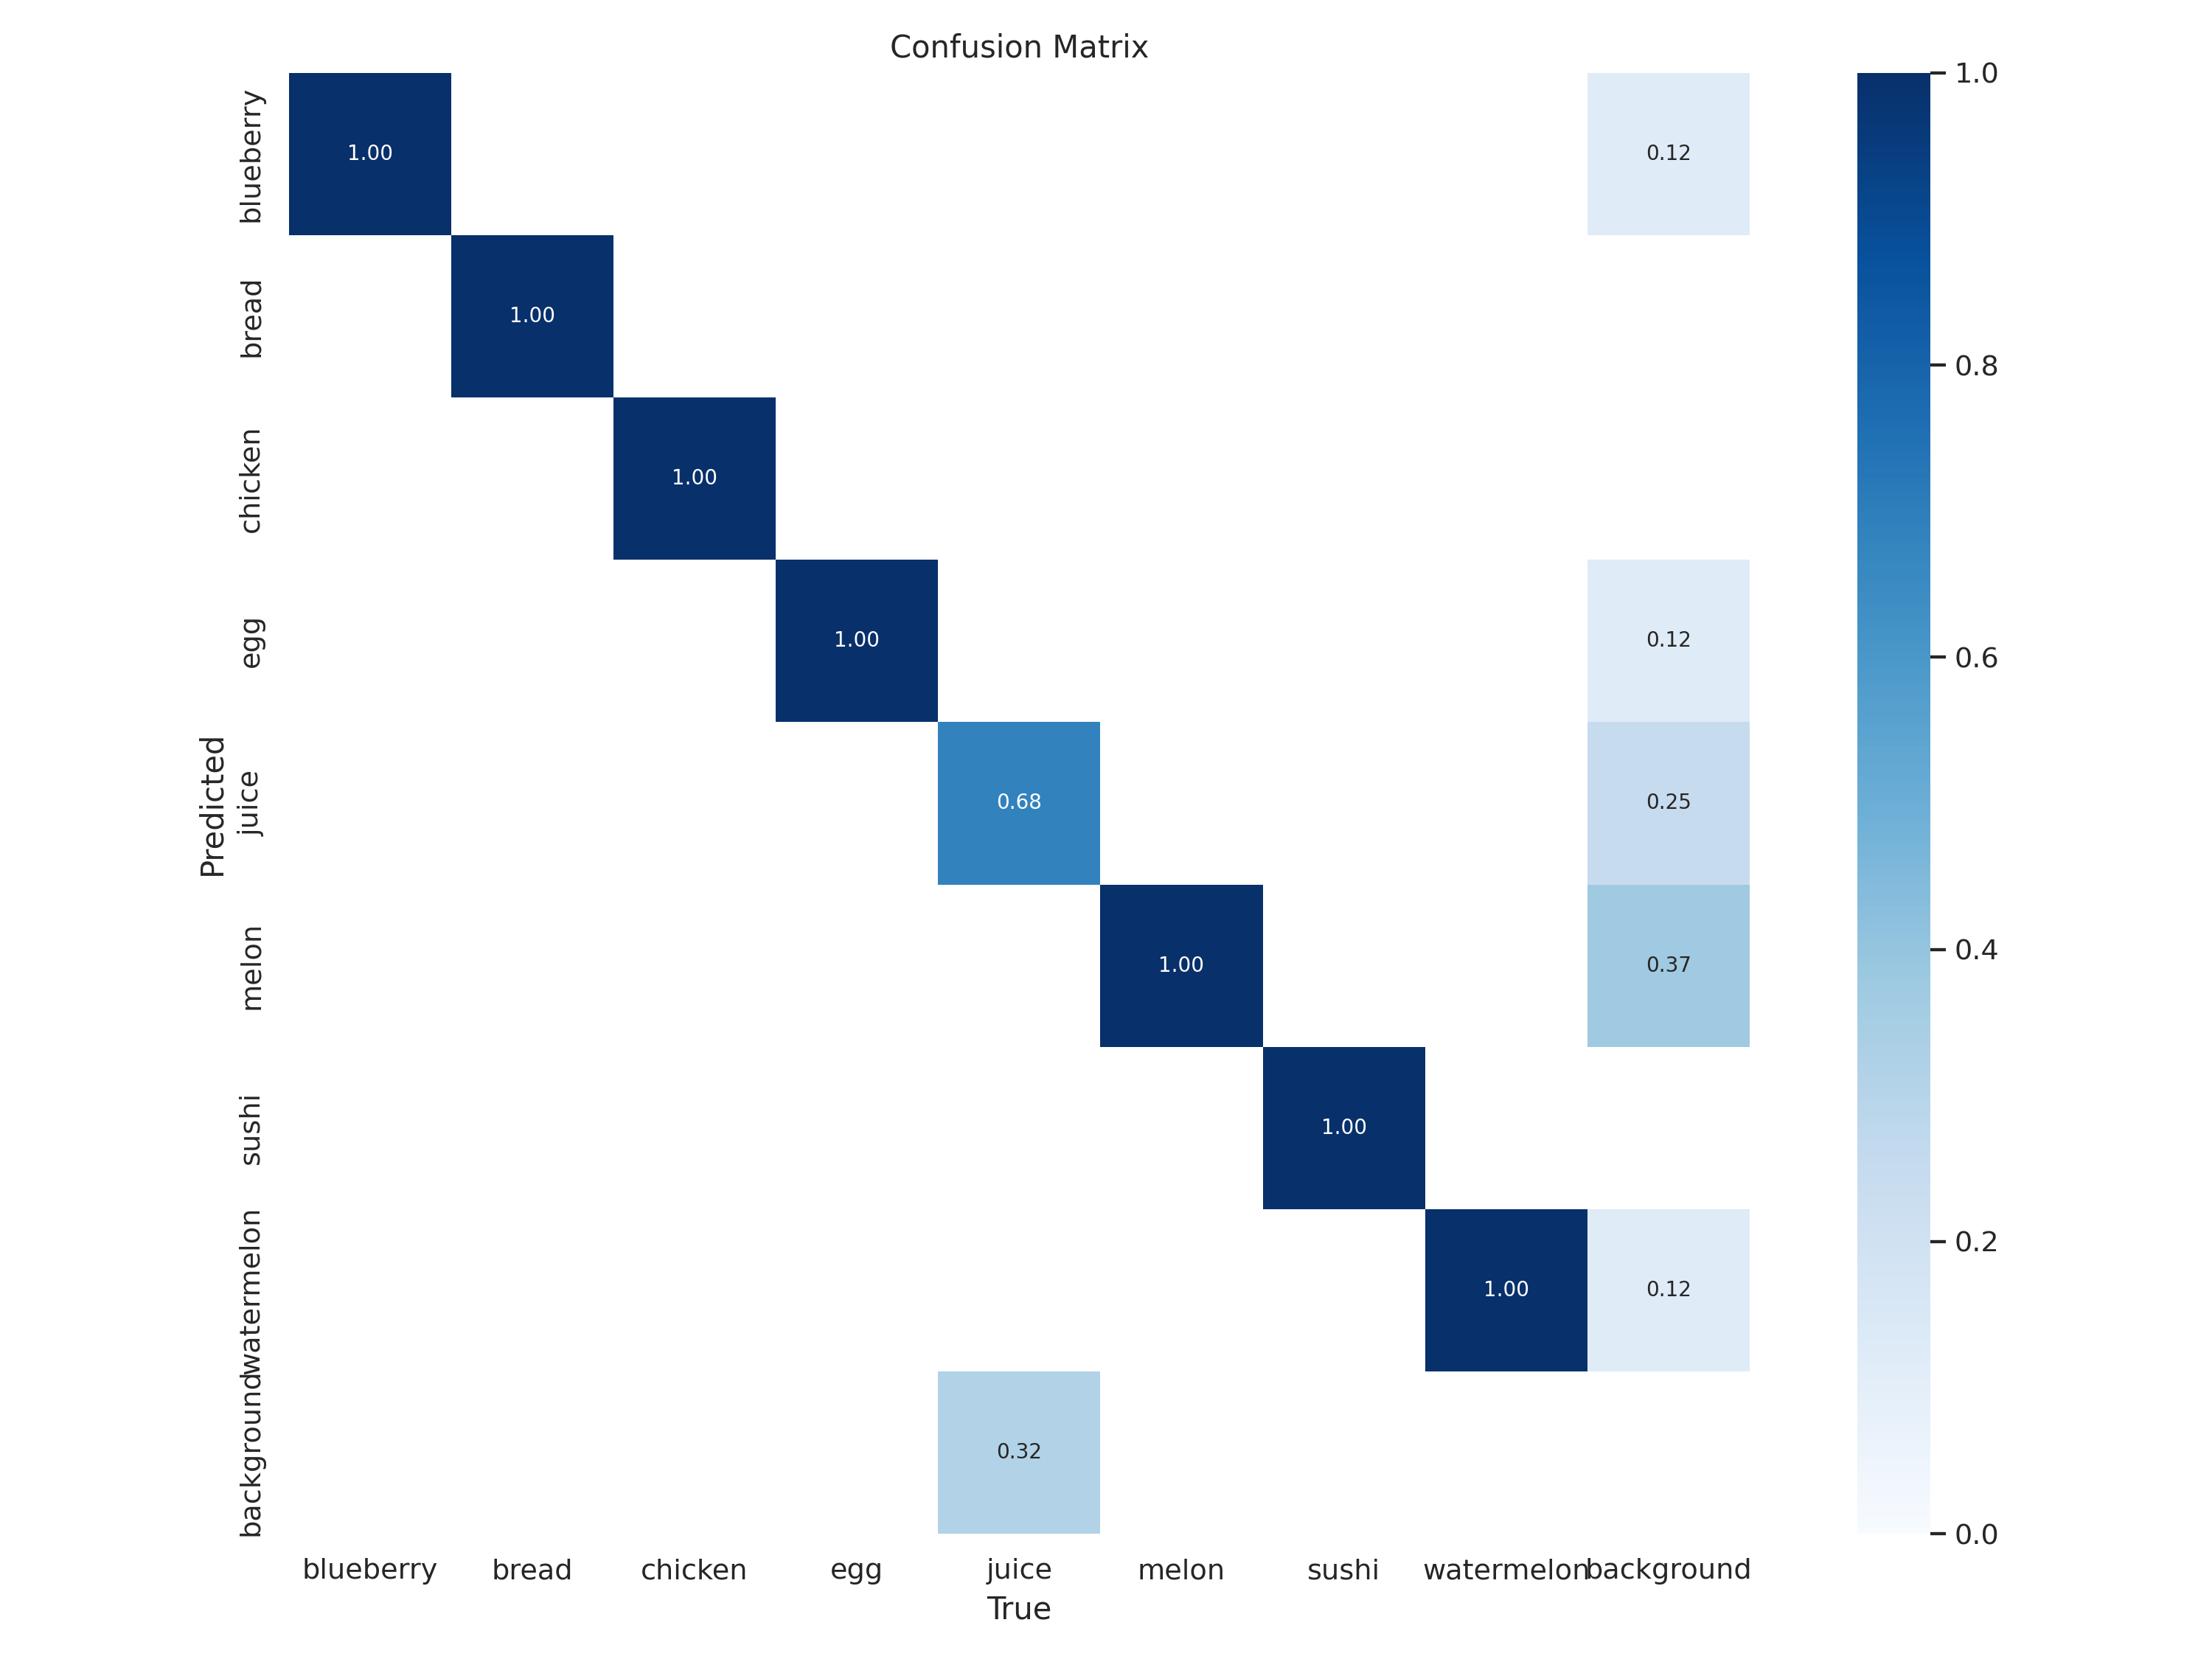

In [16]:
show_image("/content/runs/segment/val/confusion_matrix.png")

### Error Analysis
---

In [19]:
show_image("/content/runs/segment/val/val_batch0_pred.jpg")
show_image("/content/runs/segment/val/val_batch1_pred.jpg")
show_image("/content/runs/segment/val/val_batch2_pred.jpg")

Output hidden; open in https://colab.research.google.com to view.

### Model Backup
---

In [9]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [20]:
!cp -a /content/SupermarketScanner-5 /content/drive/MyDrive/SupermarketScanner

In [18]:
!cp -a /content/runs /content/drive/MyDrive/SupermarketScanner